Notebook to generate figure 2 and 3 from the paper

In [1]:
import time
import random
import numpy as np
from BradleyTerry import *

def get_features(n=5):
    feats = []
    for i in range(n):
        feats.append('f'+str(i+1))
    return feats

def gen_strengths(features):
    return {feature: random.random() for feature in features}

def gen_comp(f1, f2, s1, s2):
    if random.random() < abs(s1 - s2):
        f1, f2 = f2, f1
    return '{} > {}\n'.format(f1, f2)

def gen_min_comps(filename, features):
    with open(filename, 'w') as f:
        for feat1 in features:
            for feat2 in features:
                if feat1 != feat2:
                    f.write('{} > {}\n'.format(feat1, feat2))

def add_comps(filename, features, n=None):
    if n is None:
        n = len(features) * 50
    feature_names = list(features.keys())
    with open(filename, 'w') as f:
        for _ in range(n):
            f1, f2 = tuple(random.choices(feature_names, k=2))
            f.write(gen_comp(f1, f2, features[f1], features[f2]))

def populate(nfeats, fname, ncomps=100, verbose=False):
    fts = get_features(nfeats)
    st = gen_strengths(fts)
    #gen_min_comps('./data/{}-survey.txt'.format(dataset), st)
    if verbose:
        print(st)
    add_comps('./data/{}-survey.txt'.format(fname), st, n=len(st)*ncomps)
    return fts, st

def extract(features, fname, verbose=False):
    data = FeatureSet(features)
    data.fit('./data/{}-survey.txt'.format(fname))
    if verbose:
        print(data)
    result = []
    for feat in data.features:
        result.append(feat.strength)
    return result

def main(params = 5, factor=100):
    random.seed(0)
    fts, st = populate(params, 'titanic', ncomps=factor)
    gst = np.array([st[ft] for ft in fts])
    n_gst = gst*params / np.sum(gst)
    ist = np.array(extract(fts, 'titanic'))
    n_ist = ist*params / np.sum(ist)
    err = (n_gst - n_ist)
    return((np.mean(err ** 2)))


if __name__ == '__main__':
    main(factor=500)


In [2]:

p5 = []
p5_times = []
for f in [1,2,3,5,10,20,50,100,200,500]:
    start = time.time()
    p5.append(main(factor=f))
    p5_times.append(time.time()-start)
    
p5

[4.602116272316093,
 0.529522181223651,
 1.9639780323391995,
 0.2960769961655459,
 0.35151691895355425,
 0.21354124433810825,
 0.1027625431486106,
 0.08477520489067387,
 0.138090627551091,
 0.12555051095512967]

In [3]:

p10 = []
p10_times = []
for f in [1,2,3,5,10,20,50,100,200,500]:
    start = time.time()
    p10.append(main(params=10,factor=f))
    p10_times.append(time.time()-start)
    
p10

[8.897525801382388,
 1.1012635859105344,
 1.2593118019717073,
 0.6116467310714822,
 0.23277006477339807,
 0.17710359848844714,
 0.13349317784638132,
 0.11044472693344427,
 0.12046282820429972,
 0.14355817949309477]

In [4]:

p20 = []
p20_times = []
for f in [1,2,3,5,10,20,50,100,200,500]:
    start = time.time()
    p20.append(main(params=20,factor=f))
    p20_times.append(time.time()-start)
    
p20

[9.725200007990235,
 9.826510617082604,
 11.95856882416997,
 1.3956603298026988,
 0.4003602857116997,
 0.3481641079450619,
 0.2557092129095167,
 0.16720334314406782,
 0.1494308789355369,
 0.14052423565246344]

In [5]:

p15 = []
p15_times = []
for f in [1,2,3,5,10,20,50,100,200,500]:
    start = time.time()
    p15.append(main(params=15,factor=f))
    p15_times.append(time.time()-start)
    
p15

[13.698928914037742,
 13.19130292673513,
 2.378425599650692,
 0.5698433377562441,
 0.1556062349824376,
 0.13083494536426896,
 0.14409290391095234,
 0.14129746305256288,
 0.11930788811620911,
 0.14648562677218915]

In [6]:
import matplotlib.pyplot as plt

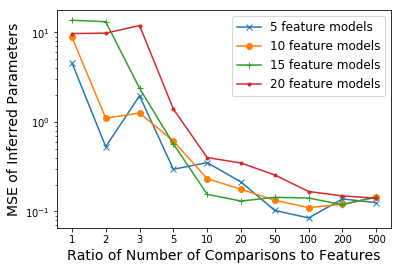

In [7]:
plt.plot([i for i in range(len(p5))], p5, marker='x', label='5 feature models')
plt.plot([i for i in range(len(p5))], p10, marker='o', label='10 feature models')
plt.plot([i for i in range(len(p5))], p15, marker='+', label='15 feature models')
plt.plot([i for i in range(len(p5))], p20, marker='.', label='20 feature models')
plt.legend(fontsize=12)
plt.xticks([i for i in range(len(p5))], [1,2,3,5,10,20,50,100,200,500])
plt.xlabel('Ratio of Number of Comparisons to Features', fontsize=14)
plt.ylabel('MSE of Inferred Parameters', fontsize=14)
plt.yscale('log')
# plt.title('Mean Squared Error of Estimated Bradley-Terry Parameters with increasing ')
plt.savefig('fig1.png', dpi=200)

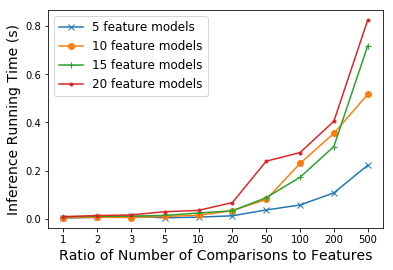

In [8]:
plt.plot([i for i in range(len(p5))], p5_times, marker='x', label='5 feature models')
plt.plot([i for i in range(len(p5))], p10_times, marker='o', label='10 feature models')
plt.plot([i for i in range(len(p5))], p15_times, marker='+', label='15 feature models')
plt.plot([i for i in range(len(p5))], p20_times, marker='.', label='20 feature models')
plt.legend(fontsize=12)
plt.xticks([i for i in range(len(p5))], [1,2,3,5,10,20,50,100,200,500])
plt.xlabel('Ratio of Number of Comparisons to Features', fontsize=14)
plt.ylabel('Inference Running Time (s)', fontsize=14)
# plt.title('Mean Squared Error of Estimated Bradley-Terry Parameters with increasing ')
plt.savefig('fig2.png', dpi=200)